# Week 36 – Emma Storberg

## Exercise 1

### a)

**Show that the optimal parameters are given by $$\hat{\boldsymbol \beta}_{Ridge} = (\mathbf X^T \mathbf X + \lambda \mathbf I )^{-1} \mathbf X^T \mathbf y $$**

We know that the optimal parameters $\hat{\mathbf \beta}_{Ridge}$ can be determined from the minimum of the cost function $C(\boldsymbol \beta)$, given by:

$$C(\boldsymbol \beta) = \frac{1}{n}(\mathbf y - \mathbf X \boldsymbol \beta)^T(\mathbf y - \mathbf X \boldsymbol \beta) + \frac{1}{n} \lambda \boldsymbol \beta^T\boldsymbol \beta$$

Using the definitions we showed last week, we find the derivative of each term of C:

$$\frac{\partial}{\partial \boldsymbol \beta} ((\mathbf y - \mathbf X \boldsymbol \beta)^T(\mathbf y - \mathbf X \boldsymbol \beta)) = -2 (\mathbf y - \mathbf X \boldsymbol \beta)^T \mathbf X$$

$$\frac{\partial}{\partial \boldsymbol \beta} (\boldsymbol \beta^T \boldsymbol I \boldsymbol \beta) = \boldsymbol \beta^T (\mathbf I + \mathbf I^T) = 2\boldsymbol \beta^T \mathbf I$$

Combining these and setting equal to 0 to find the minimum gives us the following:

$$\frac{\partial C}{\partial \boldsymbol \beta} = 0 = \frac{-2}{n} (\mathbf y - \mathbf X \boldsymbol \beta)^T \mathbf X + \frac{2}{n}\boldsymbol \beta^T \mathbf I$$

$$-\mathbf y^T \mathbf X + \boldsymbol \beta^T \mathbf X^T \mathbf X + \lambda \boldsymbol \beta^T \mathbf I = 0$$ 

$$\boldsymbol \beta^T(\mathbf X^T \mathbf X + \lambda \mathbf I) = \mathbf y^T \mathbf X$$

$$(\mathbf X^T \mathbf X + \lambda \mathbf I)^T \boldsymbol \beta = \mathbf X^T \mathbf y$$

$$(\mathbf X^T (\mathbf X^T)^T + \lambda \mathbf I^T) \boldsymbol \beta = \mathbf X^T \mathbf y$$

$$(\mathbf X^T \mathbf X + \lambda \mathbf I) \boldsymbol \beta = \mathbf X^T \mathbf y$$

$$\boldsymbol \beta = (\mathbf X^T \mathbf X + \lambda \mathbf I)^{-1} \mathbf X^T \mathbf y$$

### b)

**Show that you can write OLS solutions in terms of eigenvectors of the orthogonal matrix $\mathbf U$ as**

$$ \tilde{\mathbf y}_{OLS} = \mathbf{X\boldsymbol \beta} = \sum_{j=0}^{p-1} \mathbf u_j \mathbf u_j^T \mathbf y$$

We know that $\boldsymbol \beta$ is given by $(\mathbf X^T \mathbf X)^{-1} \mathbf X^T \mathbf y$. Let's insert this for $\boldsymbol \beta$, and also replace $\mathbf X$ with its SVD, denoted $\mathbf U \boldsymbol \Sigma \mathbf V^T$:

$$ \tilde{\mathbf y}_{OLS} = \mathbf X \boldsymbol \beta = \mathbf X (\mathbf X^T \mathbf X)^{-1} \mathbf X^T \mathbf y$$

$$\mathbf U \boldsymbol \Sigma \mathbf V^T ((\mathbf U \boldsymbol \Sigma \mathbf V^T)^T \mathbf U \boldsymbol \Sigma \mathbf V^T)^{-1} (\mathbf U \boldsymbol \Sigma \mathbf V^T)^T \mathbf y$$

$$\mathbf U \boldsymbol \Sigma \mathbf V^T (\mathbf V \boldsymbol \Sigma^T \mathbf U^T \mathbf U \boldsymbol \Sigma \mathbf V^T)^{-1} \mathbf V \boldsymbol{\Sigma}^T \mathbf U^T \mathbf y$$

$$\mathbf U \boldsymbol \Sigma \mathbf V^T (\mathbf V \boldsymbol \Sigma^T \boldsymbol \Sigma \mathbf V^T)^{-1} \mathbf V \boldsymbol{\Sigma}^T \mathbf U^T \mathbf y$$

We rename the matrix product $\boldsymbol \Sigma^T \boldsymbol \Sigma$ to $\tilde{\boldsymbol \Sigma}$. This is a square, diagonal $p \times p$ matrix with the squares of the singular values on its diagonal.

$$\mathbf U \boldsymbol \Sigma \mathbf V^T (\mathbf V^T)^{-1} \tilde{\boldsymbol \Sigma}^{-1} \mathbf V^{-1} \mathbf V \boldsymbol{\Sigma}^T \mathbf U^T \mathbf y$$

Using the fact that $\mathbf V = \mathbf (V^T)^{-1}$, we get:

$$\mathbf U \boldsymbol \Sigma  \tilde{\boldsymbol \Sigma}^{-1} \boldsymbol{\Sigma}^T \mathbf U^T \mathbf y$$

Given that $\tilde{\boldsymbol \Sigma}$ is a diagonal matrix, its inverse can be found by taking the multiplicative inverse of each diagonal element $\sigma_i^2$, namely $\sigma_i^{-2}$. We also know that the matrices $\boldsymbol \Sigma$ and $\boldsymbol \Sigma^T$ have dimensionalities $n \times p$ and $p \times n$ respectively, meaning that we end up with a diagonal $n \times n$ matrix when finding the product of these three matrices, where the first $p$ diagonals are $\sigma_i \cdot \sigma_i^{-2} \cdot \sigma_i = 1$. This is therefore the identity matrix up to the $p$-th row and column, and from there it is all zeros. Without this matrix, we would have the sum of the matrices $\mathbf u_i \mathbf u_i^T$ from 0 to $n$, but with it, we only add the first $p$ diagonals. This gives us the final sum we were looking for:

$$\tilde{\mathbf y}_{OLS} = \mathbf{U I}_p \mathbf U^T \mathbf y = \sum_{i=0}^{p-1} \mathbf u_i \mathbf u_i^T \mathbf y$$

**Show that the corresponding equation for Ridge regression is**

$$\tilde{\mathbf y}_{Ridge} = \mathbf{X\beta}_{Ridge} = \mathbf{U\Sigma V}^T (\mathbf{V \Sigma V}^T + \lambda \mathbf I)^{-1}(\mathbf{U \Sigma V}^T)^T\mathbf y = \sum_{j=0}^{p-1} \mathbf u_j \mathbf u_j^T \frac{\sigma _j^2}{\sigma _j^2 + \lambda} \mathbf y$$

We replace $\mathbf I$ with $\mathbf{VV}^T$:

$$\tilde{\mathbf y}_{Ridge} = \mathbf{X\beta}_{Ridge} = \mathbf{U\Sigma V}^T (\mathbf V \tilde{\boldsymbol \Sigma} \mathbf V^T + \lambda \mathbf{VV}^T)^{-1}(\mathbf{U \Sigma V}^T)^T\mathbf y$$

$$\mathbf{U\Sigma V}^T (\mathbf V (\tilde{\boldsymbol \Sigma} + \lambda \mathbf I) \mathbf V^T )^{-1}\mathbf V \boldsymbol \Sigma^T \mathbf U^T\mathbf y$$

$$\mathbf{U\Sigma V}^T (\mathbf V^T)^{-1} (\tilde{\boldsymbol \Sigma} + \lambda \mathbf I)^{-1} \mathbf V^{-1} \mathbf V \boldsymbol \Sigma^T \mathbf U^T\mathbf y$$


$$\mathbf{U\Sigma}  (\tilde{\boldsymbol \Sigma} + \lambda \mathbf I)^{-1} \boldsymbol \Sigma^T \mathbf U^T\mathbf y$$

At this point it is important to note that the matrix $\tilde{\boldsymbol \Sigma} + \lambda \mathbf I$ is nonsingular and therefore invertible. We see that it is a diagonal matrix, with elements in the form $\sigma_i^2 + \lambda$. As such, when it is inverted, it remains a diagonal matrix with elements in the form $(\sigma_i^2 + \lambda)^{-1}$. As in the last task, we see that the product $\boldsymbol \Sigma (\tilde{\boldsymbol \Sigma} + \lambda \mathbf I)^{-1} \boldsymbol \Sigma^T$ has elements in the form $\sigma_i \cdot (\sigma_i^2 + \lambda)^{-1} \cdot \sigma_i = \frac{\sigma _i^2}{\sigma _i^2 + \lambda}$ up to diagonal element $p-1$, and it has zeros on the diagonals after. This means that we have: 

$$ \mathbf U \begin{pmatrix}
\frac{\sigma _0^2}{\sigma _0^2 + \lambda} &          &      &        &     &      &     & \\
    &   \frac{\sigma _1^2}{\sigma _1^2 + \lambda}    &      &       &      &       &    & \\
 &  &  & \ddots  &  & & & \\
 &  &  &  & \frac{\sigma _{p-1}^2}{\sigma _{p-1}^2 + \lambda} & &  & \\
 &  &  &  & & 0 &  &\\
 &  &  &  & & & \ddots & \\
  &  &  &  & & & & 0 \\
\end{pmatrix} \mathbf U^T \mathbf y = \sum_{j=0}^{p-1} \mathbf u_j \mathbf u_j^T \frac{\sigma _j^2}{\sigma _j^2 + \lambda} \mathbf y$$

**Give an interpretation of the results.**

Ridge regression operates by finding the coordinates of our desired output $\mathbf y$ with respect to an orthonormal basis $\mathbf U$, and then shrinking these coordinates. Specifically, if the coordinates are represented as $\beta$, ridge regression shrinks them by a factor of $\frac{\sigma_i^2}{\sigma_i^2 + \lambda}$, where $\lambda$ is the regularization parameter and $\sigma_i$ are the singular values from the SVD. When dealing with small eigenvalues $\sigma_i$, their contributions to the model become less significant. By shrinking these smaller eigenvalues, ridge regression effectively reduces the number of degrees of freedom in the model. This shrinkage helps in reducing overfitting and improving the generalizability of the model. 

## Exercise 2

In [14]:
# Importing various packages
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(8)
n = 100

# Making data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

# Helper arrays
poly_list = [5, 10, 15]
lmbda_list = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [15]:
def make_model(X_train, X_test, y_train, y_test, lmbda, degree=5):
    beta_hat = np.linalg.inv(X_train.T @ X_train + lmbda*np.identity(degree)) @ X_train.T @ y_train

    y_tilde_train = X_train @ beta_hat + np.mean(y_train)
    y_tilde_test = X_test @ beta_hat + np.mean(y_train)

    # MSE of training data
    MSE_train = mean_squared_error(y_train, y_tilde_train)

    # MSE of testing data
    MSE_test = mean_squared_error(y_test, y_tilde_test)

    return MSE_train, MSE_test

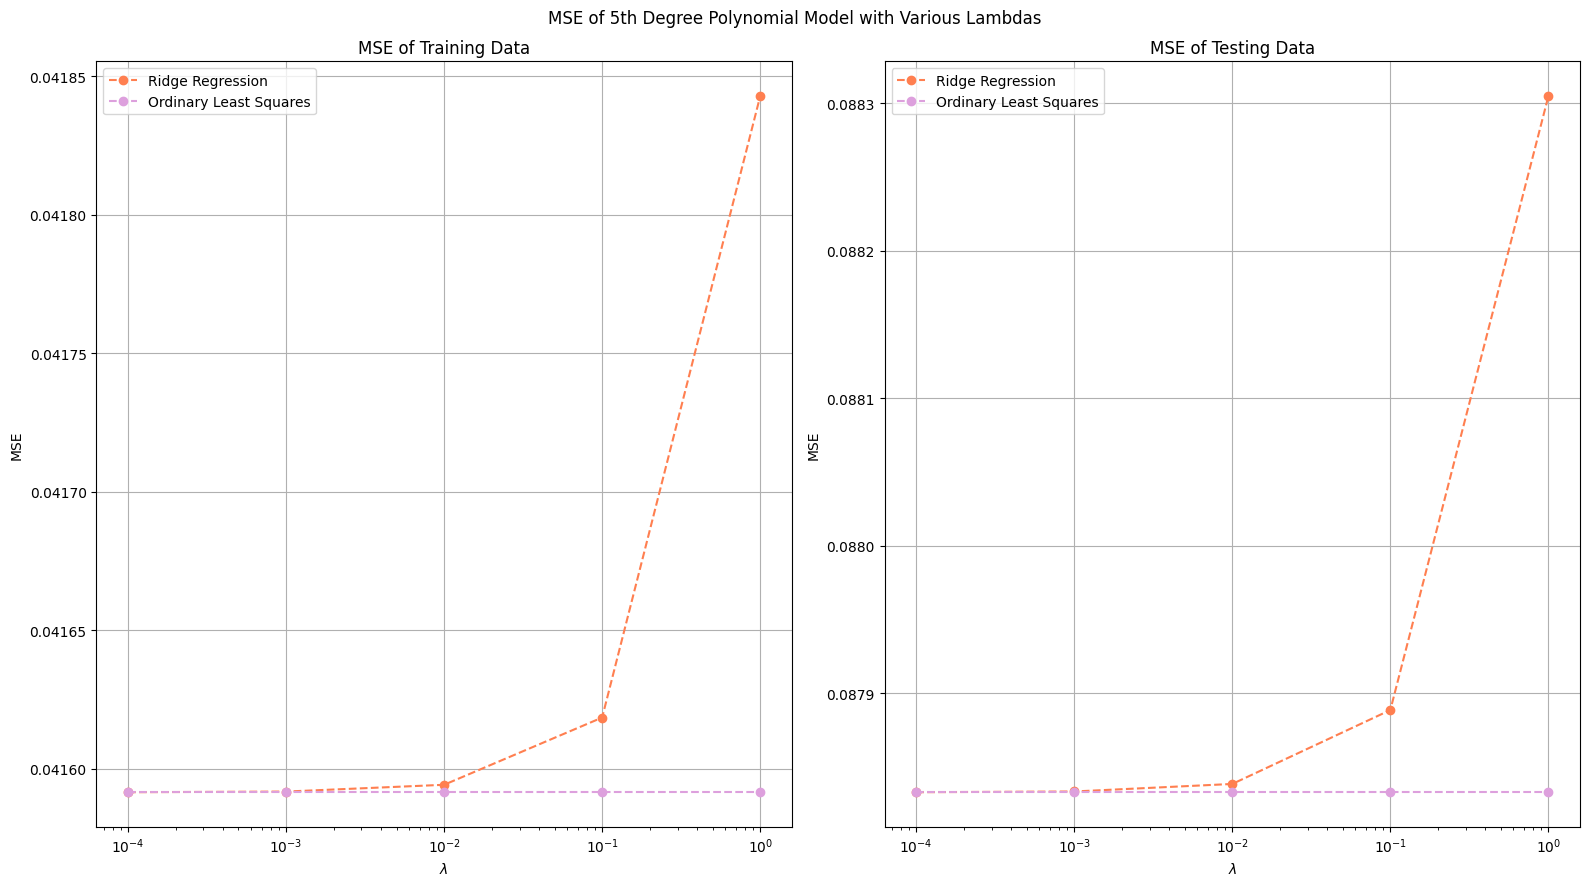

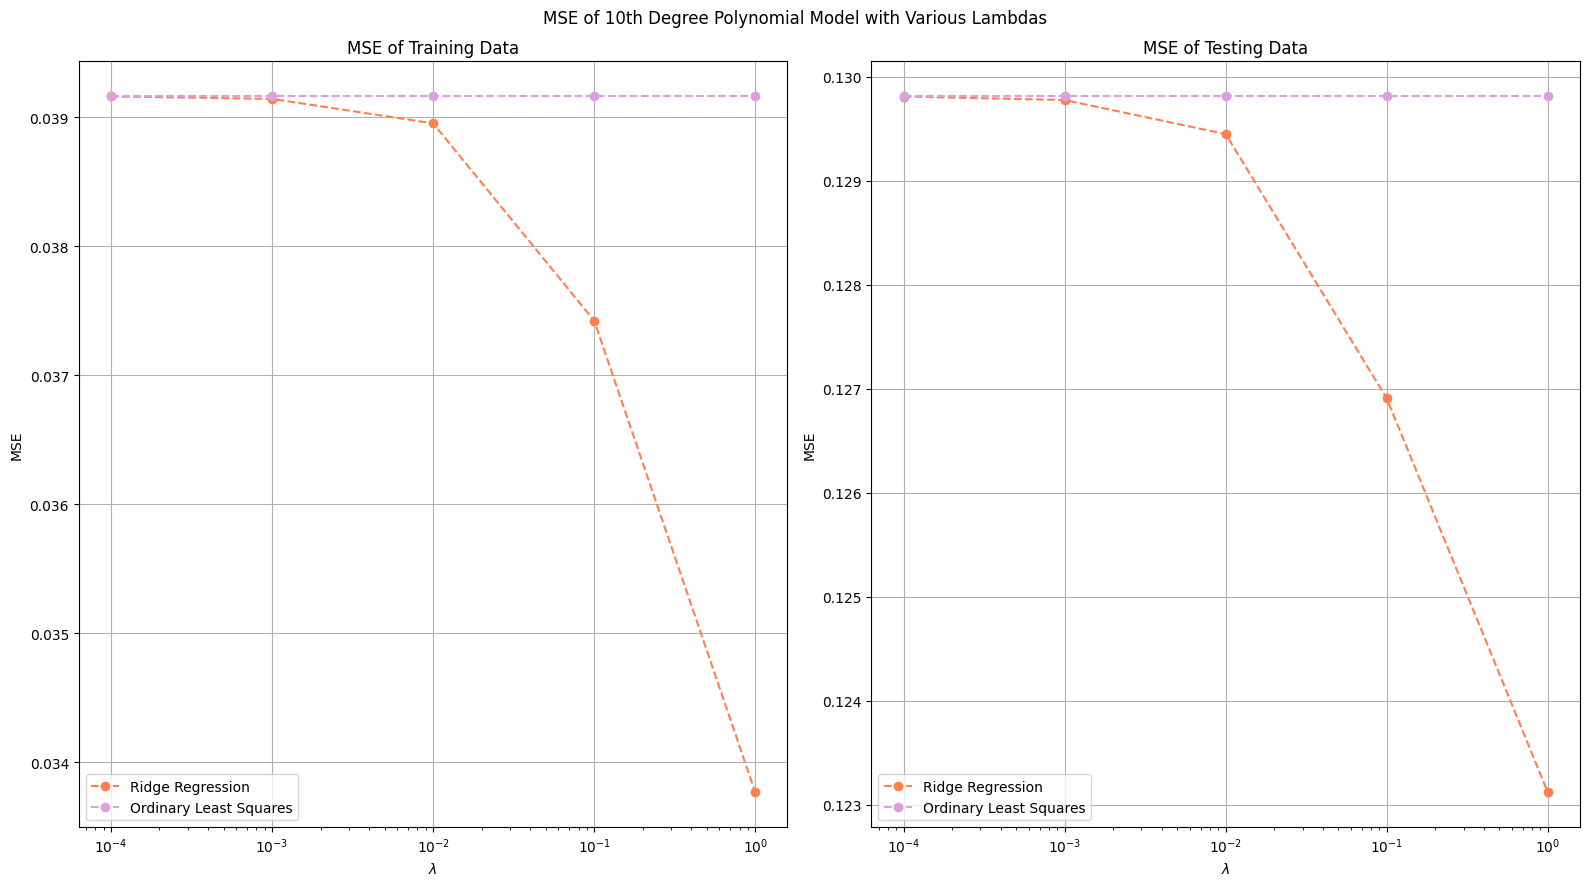

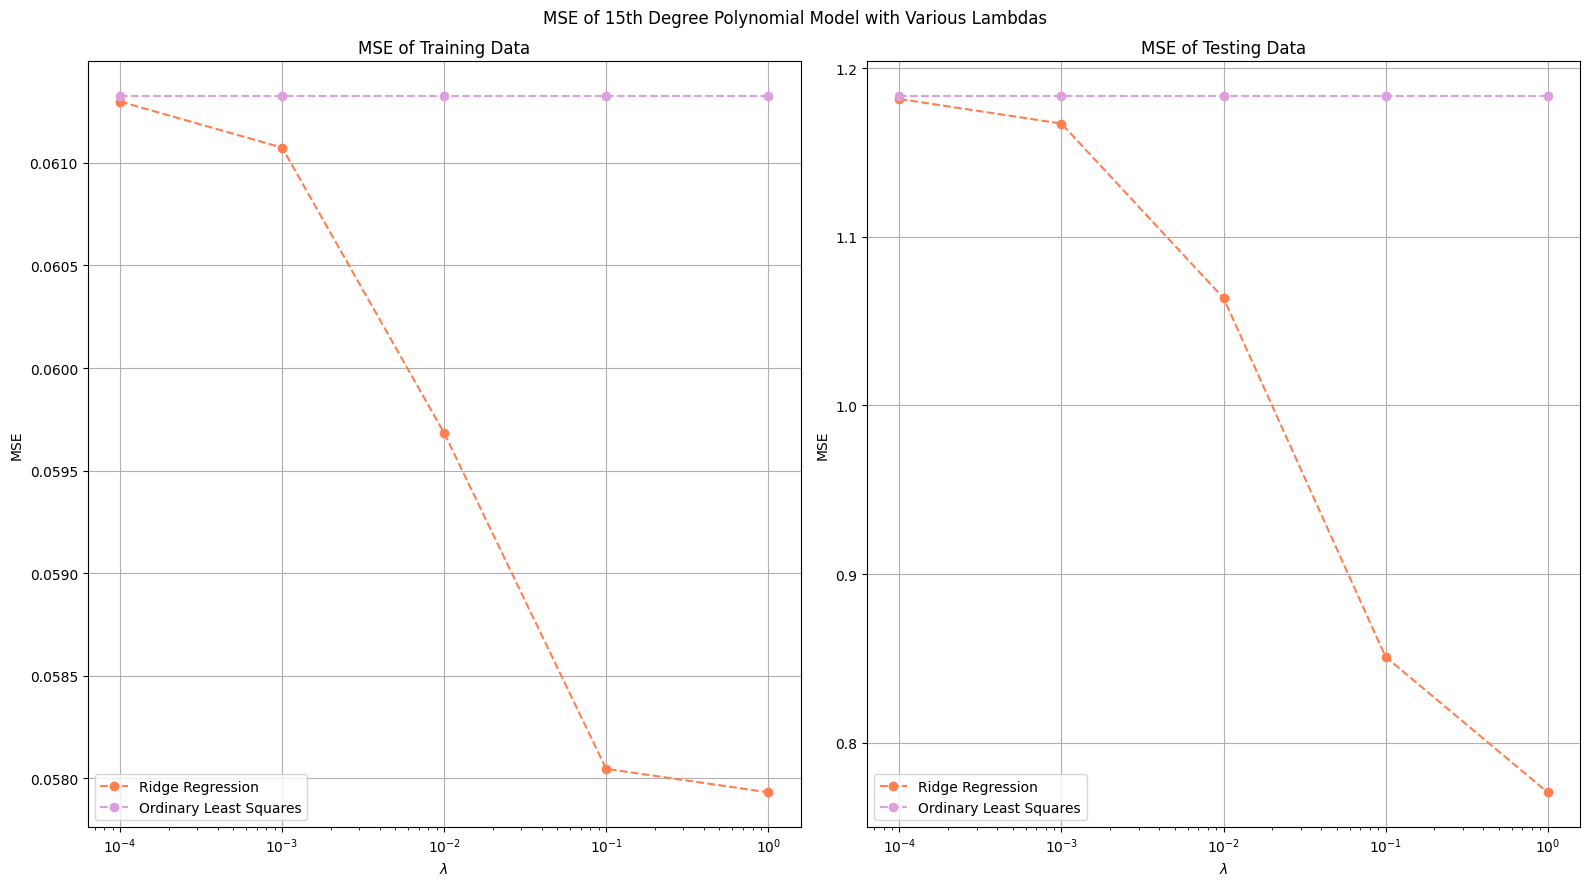

In [16]:
for degree in poly_list:
    X = np.zeros((len(x),degree))

    for i in range(degree):
        X[:,i] = x[:,0]**(i+1) 

        mean = np.mean(X[:,i])
        X[:,i] -= mean

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    train_error_ridge = []
    test_error_ridge = []

    train_error_ols = []
    test_error_ols = []

    # Gathering data from make_model function in arrays
    MSE_train_ols, MSE_test_ols = make_model(X_train, X_test, y_train, y_test, lmbda=0, degree=degree)

    for lmbda in lmbda_list:
        MSE_train_ridge, MSE_test_ridge = make_model(X_train, X_test, y_train, y_test, lmbda, degree=degree)
        train_error_ridge.append(MSE_train_ridge)
        test_error_ridge.append(MSE_test_ridge)

        train_error_ols.append(MSE_train_ols)
        test_error_ols.append(MSE_test_ols)


    # Plotting
    """
    plt.plot(lmbda_list, train_error_ridge, label="Ridge Regression Train", color="coral", linestyle="--", marker="o")
    plt.plot(lmbda_list, train_error_ols, label="Ordinary Least Squares Train", color="plum", linestyle="--", marker="o")
    plt.plot(lmbda_list, test_error_ridge, label="Ridge Regression Test", color="coral", marker="o")
    plt.plot(lmbda_list, test_error_ols, label="Ordinary Least Squares Test", color="plum", marker="o")
    plt.xlabel((r"$\lambda$"))
    plt.xscale("log")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.title(f"MSE of {degree}th Degree Polynomial Model with Various Lambdas")
    plt.show()

    """
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))

    axs[0].plot(lmbda_list, train_error_ridge, label="Ridge Regression", color="coral", linestyle="--", marker="o")
    axs[0].plot(lmbda_list, train_error_ols, label="Ordinary Least Squares", color="plum", linestyle="--", marker="o")
    axs[0].set_title("MSE of Training Data")
    axs[0].set_xlabel(r"$\lambda$")
    axs[0].set_xscale("log")
    axs[0].set_ylabel("MSE")
    #axs[0].set_ylim(0.00, 0.3)
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(lmbda_list, test_error_ridge, label="Ridge Regression", color="coral", linestyle="--", marker="o")
    axs[1].plot(lmbda_list, test_error_ols, label="Ordinary Least Squares", color="plum", linestyle="--", marker="o")
    axs[1].set_title("MSE of Testing Data")
    axs[1].set_xlabel(r"$\lambda$")
    axs[1].set_xscale("log")
    axs[1].set_ylabel("MSE")
    #axs[1].set_ylim(0.0, 1)
    axs[1].legend()
    axs[1].grid(True)

    fig.suptitle(f"MSE of {degree}th Degree Polynomial Model with Various Lambdas")
    plt.tight_layout()
    plt.show()